#INSTALLING PACKAGES

In [ ]:
#installing packages
install.packages("httr")
install.packages("rvest")
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




#LOADING LIBRARIES



In [ ]:
#loading libraries
library(httr)
library(rvest)


## DATASET CREATION

In [ ]:
# Creating an extended sample dataset for pizza sales
set.seed(123)  # for reproducibility

# Sample data with additional columns
pizza_data <- data.frame(
  day = seq(as.Date("2022-01-01"), as.Date("2022-01-10"), by="1 day"),
  sales = c(20, 25, 18, 30, 22, 27, 24, 28, 21, 26),
  pizza = c("Margherita", "Pepperoni", "Vegetarian", "Supreme", "Hawaiian", "Meat Lovers", "Cheese", "Veggie Delight", "BBQ Chicken", "Buffalo Chicken"),
  pizza_size = c("Medium", "Large", "Small", "Large", "Medium", "Large", "Medium", "Large", "Small", "Medium")
)



          day sales           pizza pizza_size
1  2022-01-01    20      Margherita     Medium
2  2022-01-02    25       Pepperoni      Large
3  2022-01-03    18      Vegetarian      Small
4  2022-01-04    30         Supreme      Large
5  2022-01-05    22        Hawaiian     Medium
6  2022-01-06    27     Meat Lovers      Large
7  2022-01-07    24          Cheese     Medium
8  2022-01-08    28  Veggie Delight      Large
9  2022-01-09    21     BBQ Chicken      Small
10 2022-01-10    26 Buffalo Chicken     Medium


In [ ]:
pizza_data

day,sales,pizza,pizza_size
<date>,<dbl>,<chr>,<chr>
2022-01-01,20,Margherita,Medium
2022-01-02,25,Pepperoni,Large
2022-01-03,18,Vegetarian,Small
2022-01-04,30,Supreme,Large
2022-01-05,22,Hawaiian,Medium
2022-01-06,27,Meat Lovers,Large
2022-01-07,24,Cheese,Medium
2022-01-08,28,Veggie Delight,Large
2022-01-09,21,BBQ Chicken,Small


In [ ]:
# Summary statistics for the data frame
summary(pizza_data)  # Equivalent to df.describe() in Python

      day                 sales          pizza            pizza_size       
 Min.   :2022-01-01   Min.   :18.00   Length:10          Length:10         
 1st Qu.:2022-01-03   1st Qu.:21.25   Class :character   Class :character  
 Median :2022-01-05   Median :24.50   Mode  :character   Mode  :character  
 Mean   :2022-01-05   Mean   :24.10                                        
 3rd Qu.:2022-01-07   3rd Qu.:26.75                                        
 Max.   :2022-01-10   Max.   :30.00                                        

## SINGLE COLUMN STATISTICS

In [ ]:
sales_stats <- summary(pizza_data$sales)
sales_stats

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   21.25   24.50   24.10   26.75   30.00 

## MEAN

In [ ]:
mean_sales <- mean(pizza_data$sales)
mean_sales

[1] 24.1

mean_sales: The mean (average) of the sales values, indicating the central tendency of the data

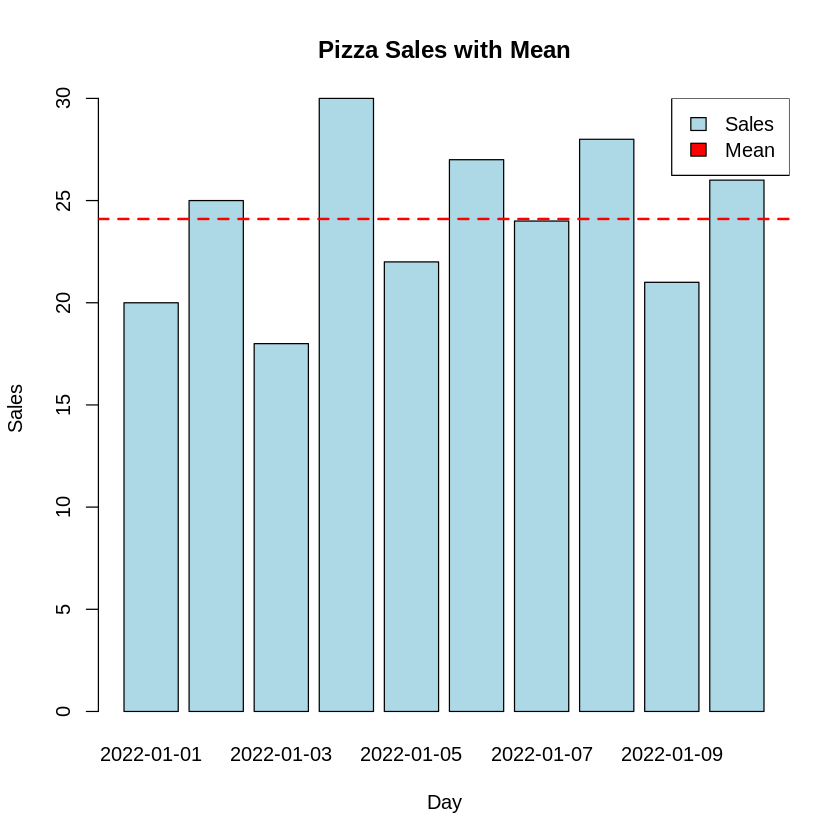

In [ ]:
# Create a bar plot
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Mean", ylab = "Sales", xlab = "Day")
abline(h = mean_sales, col = "red", lty = 2, lw = 2)  # Add a horizontal line for the mean
legend("topright", legend = c("Sales", "Mean"), fill = c("lightblue", "red"))


## MEDIAN

In [ ]:
median_sales <- median(pizza_data$sales)
median_sales

[1] 24.5

median_sales: The median, which is the middle value when the data is sorted, providing an alternative measure of central tendency.

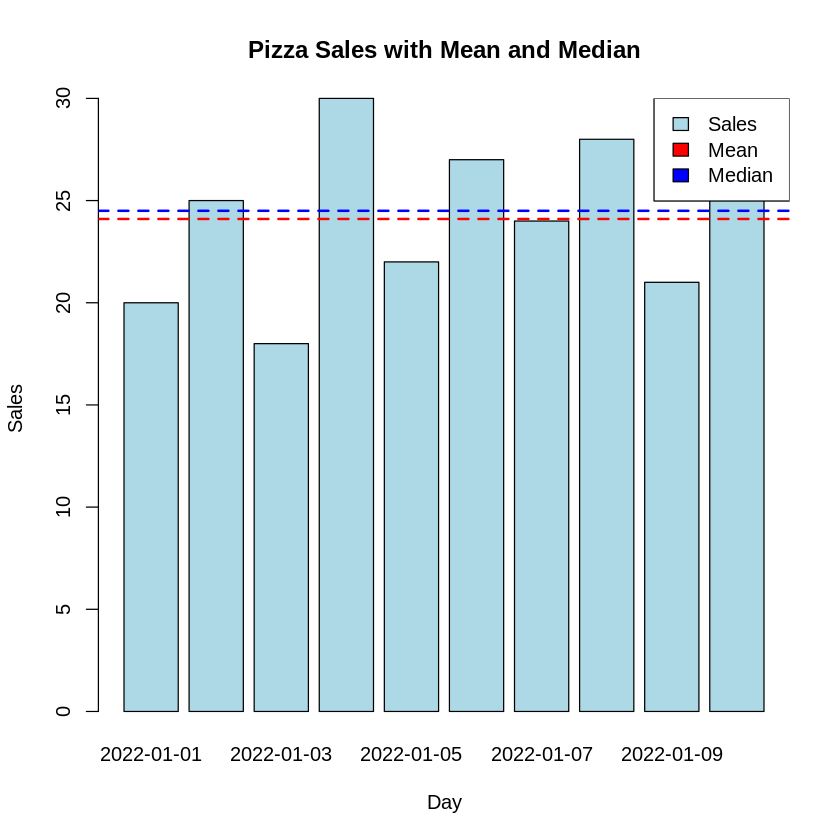

In [ ]:
# Create a bar plot with mean and median
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Mean and Median", ylab = "Sales", xlab = "Day")
abline(h = mean_sales, col = "red", lty = 2, lw = 2)  # Add a horizontal line for the mean
abline(h = median_sales, col = "blue", lty = 2, lw = 2)  # Add a horizontal line for the median
legend("topright", legend = c("Sales", "Mean", "Median"), fill = c("lightblue", "red", "blue"))


## MODE

In [ ]:
mode_sales <- as.numeric(names(table(pizza_data$sales))[which.max(table(pizza_data$sales))])
mode_sales

[1] 18

mode_sales: The mode, representing the most frequently occurring value in the sales data.

## STANDARD DEVIATION

In [ ]:
std_dev_sales <- sd(pizza_data$sales)
std_dev_sales


[1] 3.813718

std_dev_sales: The standard deviation, a measure of the amount of variation or dispersion in the sales data.

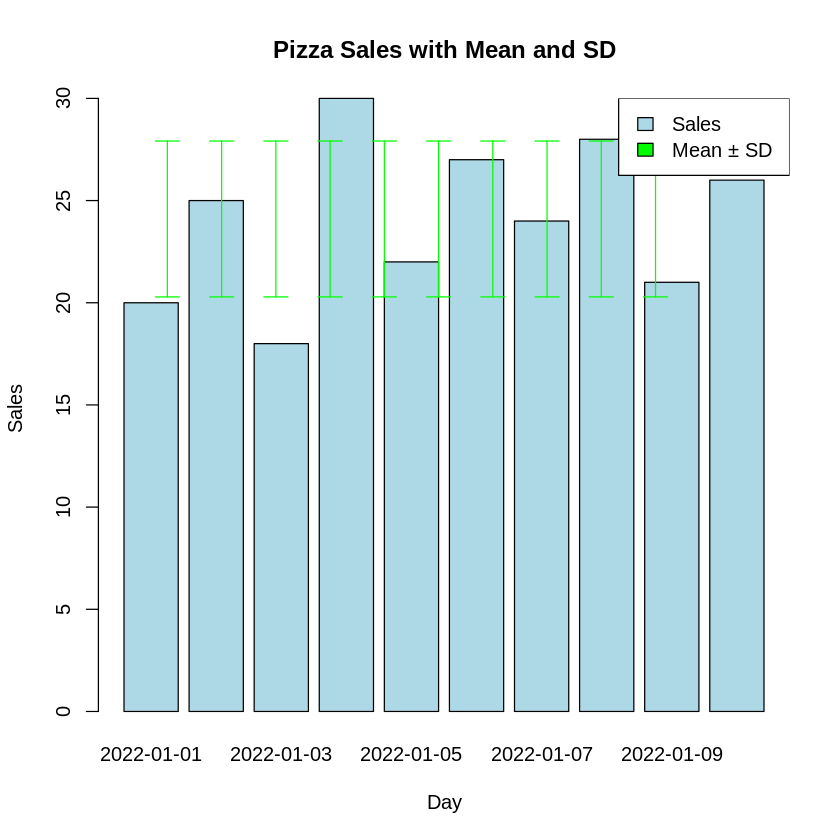

In [ ]:
# Create a bar plot with error bars
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Mean and SD", ylab = "Sales", xlab = "Day")
arrows(seq_along(pizza_data$sales), mean_sales - std_dev_sales, seq_along(pizza_data$sales), mean_sales + std_dev_sales, angle = 90, code = 3, length = 0.1, col = "green")
legend("topright", legend = c("Sales", "Mean ± SD"), fill = c("lightblue", "green"))

## VARIANCE

In [ ]:
variance_sales <- var(pizza_data$sales)
variance_sales


[1] 14.54444

variance_sales: The variance, which is the square of the standard deviation, providing another measure of data spread

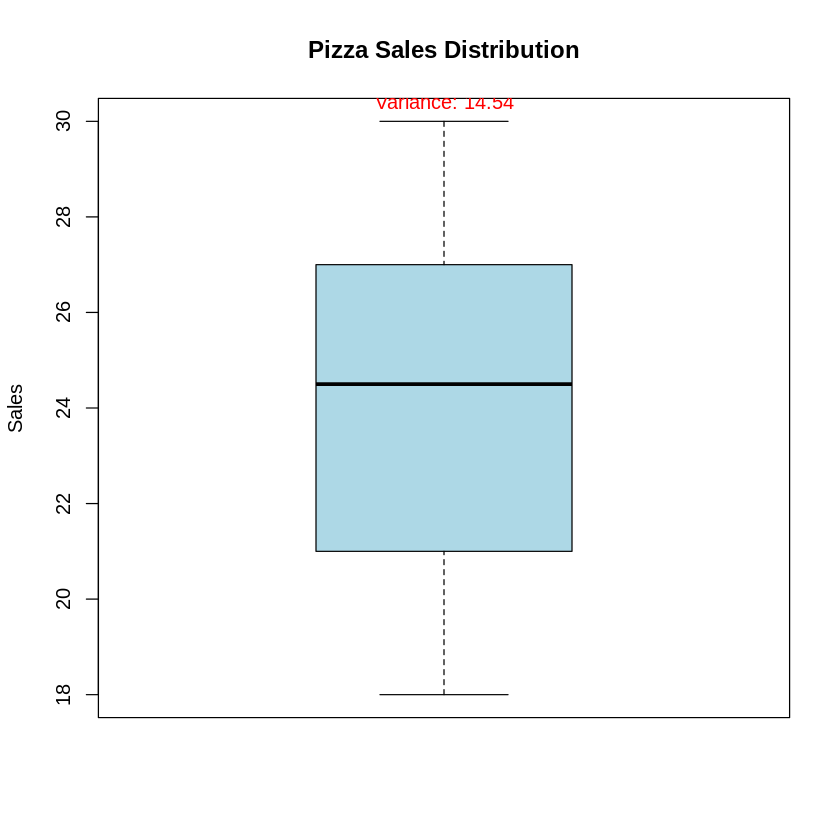

In [ ]:
# Create a box plot
boxplot(pizza_data$sales, main = "Pizza Sales Distribution", ylab = "Sales", col = "lightblue")

# Add text annotation for variance
text(1, max(pizza_data$sales), paste("Variance:", round(var(pizza_data$sales), 2)), pos = 3, col = "red")


## RANGE

In [ ]:
range_sales <- range(pizza_data$sales)
range_sales


[1] 18 30

range_sales: The range, which is the difference between the maximum and minimum sales values.

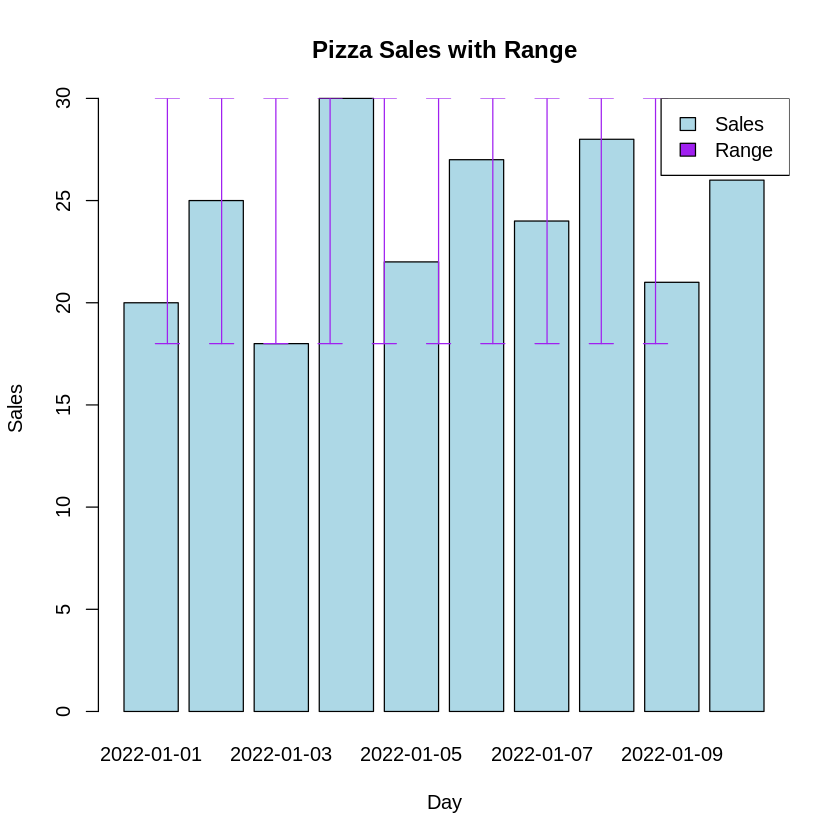

In [ ]:
# Create a bar plot with error bars
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Range", ylab = "Sales", xlab = "Day")
arrows(seq_along(pizza_data$sales), range_sales[1], seq_along(pizza_data$sales), range_sales[2], angle = 90, code = 3, length = 0.1, col = "purple")
legend("topright", legend = c("Sales", "Range"), fill = c("lightblue", "purple"))


## QUARTILES

In [ ]:
quartiles_sales <- quantile(pizza_data$sales, c(0.25, 0.5, 0.75))
quartiles_sales


25%   50%   75% 
21.25 24.50 26.75

sales_stats: A summary of basic statistics such as minimum, 1st quartile (Q1), median (2nd quartile or Q2), mean, 3rd quartile (Q3), and maximum.

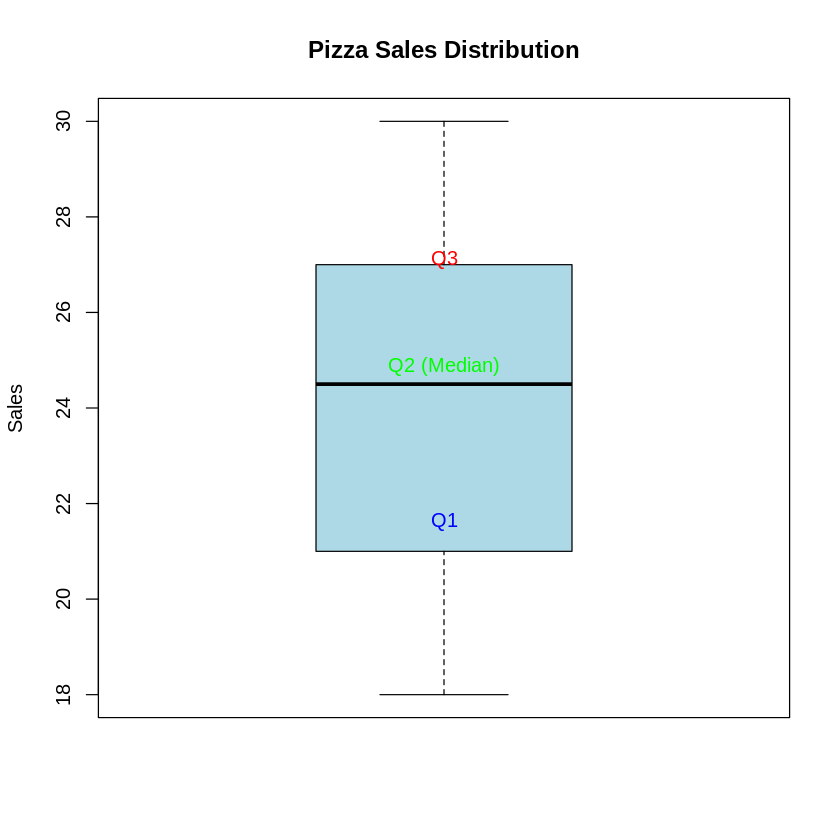

In [ ]:
# Create a box plot
boxplot(pizza_data$sales, main = "Pizza Sales Distribution", ylab = "Sales", col = "lightblue")

# Add text annotations for quartiles
text(1, quantile(pizza_data$sales, 0.75), "Q3", pos = 3, col = "red")
text(1, median(pizza_data$sales), "Q2 (Median)", pos = 3, col = "green")
text(1, quantile(pizza_data$sales, 0.25), "Q1", pos = 3, col = "blue")


## MIN

In [ ]:
min_sales <- min(pizza_data$sales)
min_sales


[1] 18

min_sales: The minimum sales value in the dataset

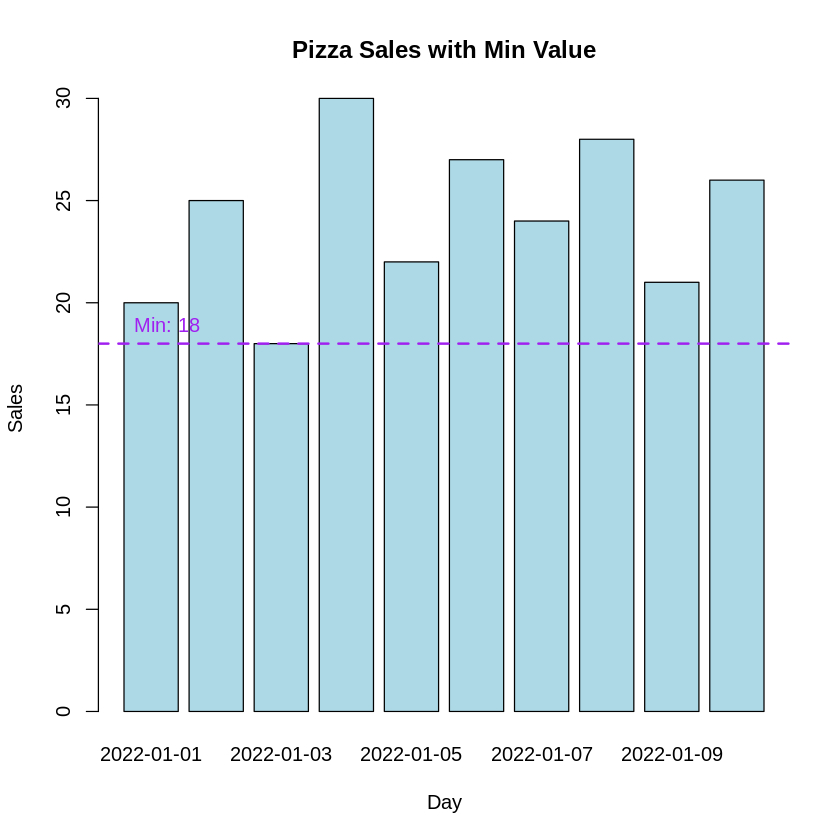

In [ ]:
# Calculate the minimum sales
min_sales <- min(pizza_data$sales)

# Create a bar plot
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Min Value", ylab = "Sales", xlab = "Day")

# Add a vertical line for the minimum value
abline(h = min_sales, col = "purple", lty = 2, lw = 2)

# Add text annotation for the minimum value
text(1, min_sales, paste("Min:", min_sales), pos = 3, col = "purple")

# Show the plot


## MAX

In [ ]:
max_sales <- max(pizza_data$sales)
max_sales


[1] 30

max_sales: The maximum sales value in the dataset

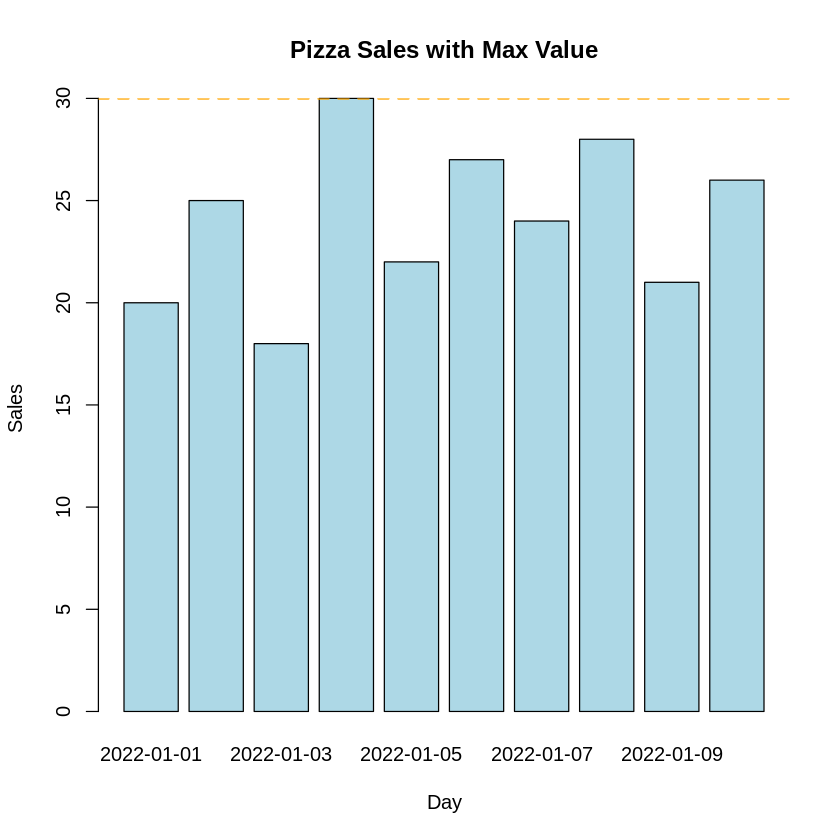

In [ ]:
# Calculate the maximum sales
max_sales <- max(pizza_data$sales)

# Create a bar plot
barplot(pizza_data$sales, names.arg = pizza_data$day, col = "lightblue", main = "Pizza Sales with Max Value", ylab = "Sales", xlab = "Day")

# Add a vertical line for the maximum value
abline(h = max_sales, col = "orange", lty = 2, lw = 2)

# Add text annotation for the maximum value
text(1, max_sales, paste("Max:", max_sales), pos = 3, col = "orange")


## COUNT

In [ ]:
count_sales <- length(pizza_data$sales)
count_sales

[1] 10

count_sales: The count or number of values in the 'sales' column.

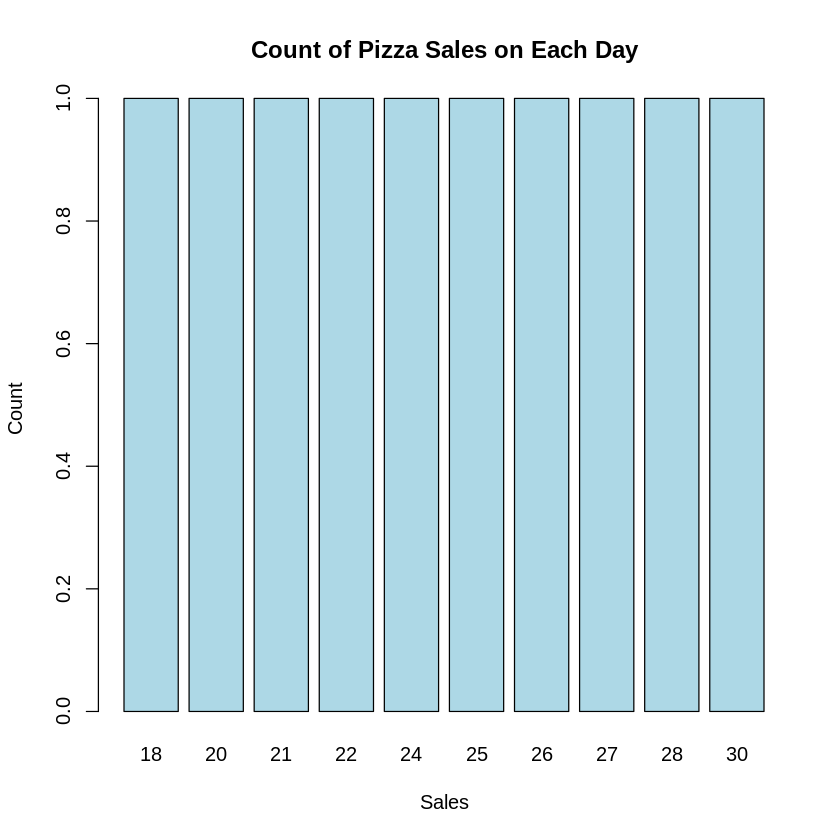

In [ ]:
# Calculate the count of sales on each day
count_sales <- table(pizza_data$sales)

# Create a bar plot
barplot(count_sales, main = "Count of Pizza Sales on Each Day", ylab = "Count", xlab = "Sales", col = "lightblue")

# Add text annotations for each bar
text(seq_along(count_sales), count_sales, labels = as.character(count_sales), pos = 3, col = "red")

# Show the plot


## SKEWNESS AND KURTOSIS


In [ ]:
# Install and load the e1071 library
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}
library(e1071)

# Calculate skewness
skewness_sales <- skewness(pizza_data$sales)
cat("Skewness:", skewness_sales, "\n")

# Calculate kurtosis
kurtosis_sales <- kurtosis(pizza_data$sales)
cat("Kurtosis:", kurtosis_sales, "\n")


Skewness: -0.06901226 
Kurtosis: -1.436965 


skewness_sales: A measure of the asymmetry in the sales data distribution. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.


kurtosis_sales: A measure of the tails and sharpness of the peak of the sales data distribution. Positive kurtosis indicates heavy tails and a peaked distribution, while negative kurtosis suggests light tails and a flat distribution.

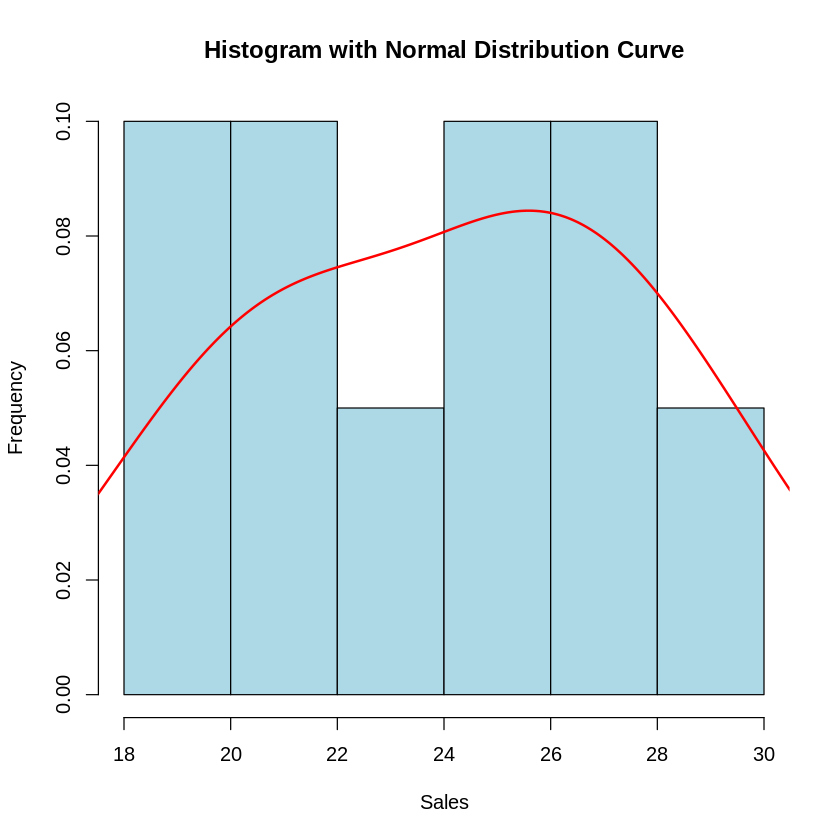

In [ ]:
# Install and load required libraries
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")
}
library(e1071)

# Calculate skewness and kurtosis
skewness_sales <- skewness(pizza_data$sales)
kurtosis_sales <- kurtosis(pizza_data$sales)

# Create a histogram with a normal distribution curve
hist(pizza_data$sales, col = "lightblue", main = "Histogram with Normal Distribution Curve", xlab = "Sales", ylab = "Frequency", probability = TRUE)
lines(density(pizza_data$sales), col = "red", lwd = 2)  # Add a density curve

# Add text annotations for skewness and kurtosis
text(35, 0.15, paste("Skewness:", round(skewness_sales, 2)), col = "blue")
text(35, 0.12, paste("Kurtosis:", round(kurtosis_sales, 2)), col = "green")

# Show the plot
